<a href="https://colab.research.google.com/github/nnguyenu/ML-basic/blob/main/Perceptron_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\mathbf{w}_{t+1}^T\mathbf{x}_i = (\mathbf{w}_{t} + y_i\mathbf{x}_i)^T\mathbf{x}_{i}
= \mathbf{w}_{t}^T\mathbf{x}_i + y_i ||\mathbf{x}_i||_2^2$

[[2.22096057 2.70132234 3.08493823 2.02701417 2.73223639 1.21171968
  2.22920603 1.8637762  1.74682699 2.37191737]
 [2.19579728 3.43487375 2.70849736 1.47010441 2.32571583 2.23682627
  1.72925457 1.59716548 2.27230351 2.37595358]]


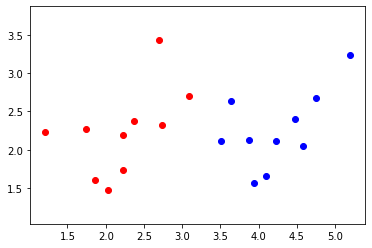

(2, 20)


In [18]:
# generate data with list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
# each point is a column
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

# plot X0,X1
x,y = X0
plt.scatter(x,y,c='r')
x,y = X1
plt.scatter(x,y,c='b')
plt.axis('equal')
plt.show()

X = np.concatenate((X0, X1), axis = 1)
print(X.shape)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

In [46]:
def h(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    return np.array_equal(np.sign(np.dot(w.T,X)),y)

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = []
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            # xi is the mix_id[i]-th column
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi) != yi: # misclassified point
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 
                w.append(w_new) 
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

# create (3,1) array with mean 0, variance 1
w_init = np.random.randn(X.shape[0], 1)
(w, m) = perceptron(X, y, w_init)
print(w[-1])

[[  5.48398246]
 [-10.73944233]
 [ 12.6230547 ]]
